In [156]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import statsmodels.formula.api as smf
import geopandas as gpd
import folium
from folium.features import GeoJsonTooltip
import pygris
from pygris.data import get_census 

## Deaths by Gender

In [157]:
# Upload cleaned dataset

all_deaths_ok = pd.read_csv("../data/output/all-deaths_by-county-sex-race_oklahoma_2010-2023.csv")
# Visualuze
all_deaths_ok.groupby(['year','county','sex','race']).sum().head(20)

deaths
year county  sex    race                                             
2010 Adair   Female American Indian or Alaska Native              0.0
                    Asian                                         0.0
                    Black or African American                     0.0
                    More than one race                            0.0
                    Native Hawaiian or Other Pacific Islander     0.0
                    Other                                         0.0
                    Unknown                                       0.0
                    White                                         0.0
             Male   American Indian or Alaska Native             12.0
                    Asian                                         0.0
                    Black or African American                     0.0
                    More than one race                            0.0
                    Native Hawaiian or Other Pacific Islander     0.0
                    Other                                         0.0
                    Unknown                                       0.0
                    White                                         7.0
     Alfalfa Female American Indian or Alaska Native              0.0
                    Asian                                         0.0
                    Black or African American                     0.0
                    More than one race                            0.0

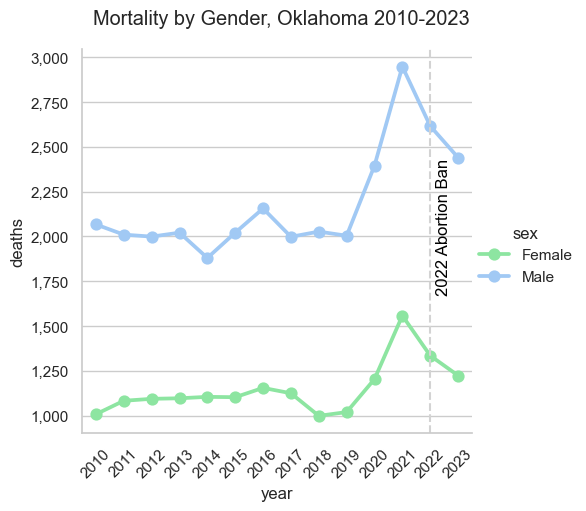

In [158]:
# Visualize general trend between all males and all females

male_female_did = all_deaths_ok[['year','sex','deaths']].groupby(['year','sex']).sum().reset_index()

sns.set_theme(style="whitegrid", palette="pastel")

g = sns.catplot(
    data=male_female_did,
    x="year",
    y="deaths",
    hue="sex",
    palette={"Male": "b", "Female": "g"},
    markers="o",
    linestyles="-",
    kind="point",
)

# Set plot title 
g.fig.suptitle("Mortality by Gender, Oklahoma 2010-2023")
g.fig.subplots_adjust(top=0.9) # Adjust so title doesn't overlap

# Rotate x-ticks
plt.xticks(rotation=45)

# Add line for 2022 abortion ban
plt.axvline(x=12, linestyle='--', color='lightgrey') 
# Add a label next to the vertical line
ymax = g.ax.get_ylim()[1]  # Top of y-axis
g.ax.text(12 + 0.2, ymax*0.8, "2022 Abortion Ban", rotation=90, color='black', va='top', ha='left')

# Format y-axis with commas
g.ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

plt.show()


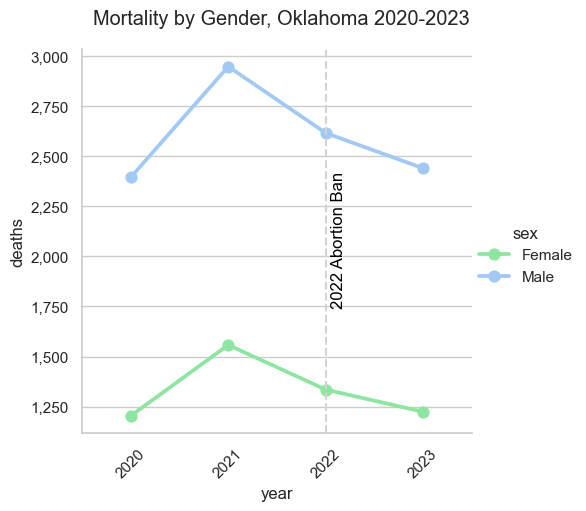

In [159]:
# Closer look at recent years

sns.set_theme(style="whitegrid", palette="pastel")

g = sns.catplot(
    data=male_female_did[male_female_did["year"].isin([2020,2021,2022,2023])],
    x="year",
    y="deaths",
    hue="sex",
    palette={"Male": "b", "Female": "g"},
    markers="o",
    linestyles="-",
    kind="point",
)

# Set plot title 
g.fig.suptitle("Mortality by Gender, Oklahoma 2020-2023")
g.fig.subplots_adjust(top=0.9) # Adjust so title doesn't overlap

# Rotate x-ticks
plt.xticks(rotation=45)

# Add line for 2022 abortion ban
plt.axvline(x=2, linestyle='--', color='lightgrey') 
# Add a label next to the vertical line
ymax = g.ax.get_ylim()[1]  # Top of y-axis
g.ax.text(2 + 0.05, ymax*0.8, "2022 Abortion Ban", rotation=90, color='black', va='top', ha='left')


# Format y-axis with commas
g.ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

plt.show()


In [160]:
# DID analysis: Female deaths decreased by ~251 more deaths than males in 2022–23

# Create treatment and post variables
male_female_did['treat'] = (male_female_did['sex'] == 'Female').astype(int)
male_female_did['post'] = (male_female_did['year'] >= 2022).astype(int)

male_female_did['year'] = male_female_did['year'].astype('category')

# Interaction term is automatically created in the formula
did_fe = smf.ols(
    'deaths ~ treat*post + C(year)',
    data=male_female_did
).fit(cov_type='HC1') # robust SEs

print(did_fe.summary())


                            OLS Regression Results                            
Dep. Variable:                 deaths   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     258.3
Date:                Wed, 03 Dec 2025   Prob (F-statistic):           1.08e-12
Time:                        19:47:06   Log-Likelihood:                -159.40
No. Observations:                  28   AIC:                             350.8
Df Residuals:                      12   BIC:                             372.1
Df Model:                          15                                         
Covariance Type:                  HC1                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2036.4583     40.852     

/opt/anaconda3/lib/python3.13/site-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 16, but rank is 15
  warnings.warn('covariance of constraints does not have full '


## Births by Race

In [161]:
# Upload cleaned dataset 
births_by_race = pd.read_csv("../data/output/oklahoma_births-by-county_by-race_2010-2024.csv")

# Visualuze
births_by_race.groupby(['year','county','race']).sum().head(20)

births  population  birth_rate
year county  race                                                            
2010 Adair   American Indian or Alaska Native   169.0     10210.0        16.6
             Asian                                0.0       136.0         0.0
             Black or African American            0.0        69.0         0.0
             More than one race                   5.0      2306.0         2.2
             Other                                0.0         0.0         0.0
             Unknown                            131.0         0.0         0.0
             White                               63.0     10038.0         6.3
     Alfalfa American Indian or Alaska Native     0.0       174.0         0.0
             More than one race                   0.0       102.0         0.0
             Other                                0.0         0.0         0.0
             White                               42.0      5101.0         8.2
     Atoka   American Indian or Alaska Native    37.0      2030.0        18.2
             Black or African American            7.0       521.0        13.4
             More than one race                   0.0      1006.0         0.0
             White                              123.0     10596.0        11.6
     Beaver  Black or African American            0.0        45.0         0.0
             Other                                0.0         0.0         0.0
             White                               63.0      5369.0        11.7
     Beckham American Indian or Alaska Native    13.0       682.0        19.1
             Asian                                0.0       204.0         0.0

/var/folders/7w/t6w_w15x5nb5xfxzxr9z18g80000gn/T/ipykernel_56241/1191878209.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.ax.set_xticklabels(g.ax.get_xticklabels(), rotation=45)


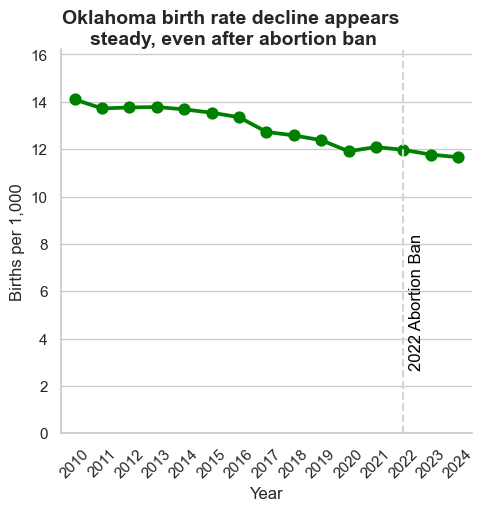

In [170]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import StrMethodFormatter

# Aggregate births by year and recalc birth_rate
all_births = births_by_race[["year", "births", "population", "birth_rate"]].groupby("year").sum().reset_index()
all_births["birth_rate"] = round(1000 * (all_births["births"] / all_births["population"]), 2)

# Convert year to string so Seaborn treats it categorically
all_births['year_str'] = all_births['year'].astype(str)

sns.set_theme(style="whitegrid", palette="pastel")

g = sns.catplot(
    data=all_births,
    x="year_str",
    y="birth_rate",
    color="green",
    markers="o",
    linestyles="-",
    kind="point",
)

# Expand y-axis and start at 0
ymax = all_births["birth_rate"].max()
g.ax.set_ylim(0, ymax * 1.15)

# Title
g.fig.suptitle("Oklahoma birth rate decline appears \nsteady, even after abortion ban", fontsize=14, weight='bold')
g.fig.subplots_adjust(top=0.9)

# Axis labels
g.set_axis_labels("Year", "Births per 1,000")

# Rotate x-ticks
g.ax.set_xticklabels(g.ax.get_xticklabels(), rotation=45)

# Add vertical line at 2022
x_index = all_births[all_births['year']==2022].index[0]  # numeric index for 2022
g.ax.axvline(x=x_index, linestyle='--', color='lightgrey', linewidth=1.5)

# Add text label
g.ax.text(
    x_index + 0.2, 
    ymax * 0.6, 
    "2022 Abortion Ban", 
    rotation=90, 
    color='black', 
    va='top', 
    ha='left'
)

# Format y-axis with commas
g.ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

plt.show()


                            OLS Regression Results                            
Dep. Variable:             birth_rate   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     176.7
Date:                Mon, 17 Nov 2025   Prob (F-statistic):           1.39e-09
Time:                        17:04:16   Log-Likelihood:                -65.265
No. Observations:                  15   AIC:                             138.5
Df Residuals:                      11   BIC:                             141.4
Df Model:                           3                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1423.1023     13.753    103.476      0.0

/opt/anaconda3/lib/python3.13/site-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=15 observations were given.
  return hypotest_fun_in(*args, **kwds)


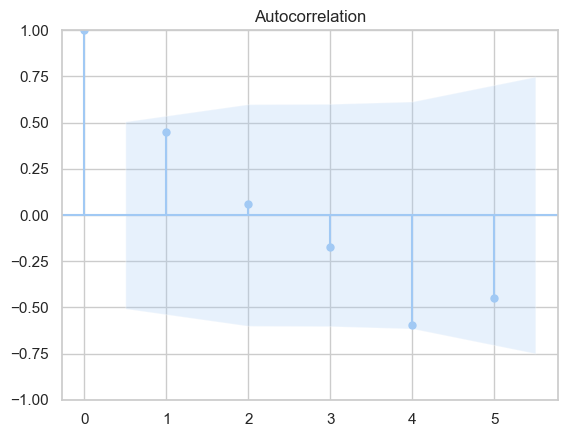

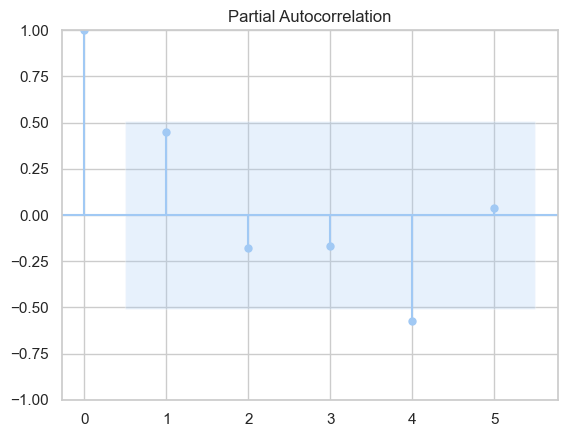

                               SARIMAX Results                                
Dep. Variable:             birth_rate   No. Observations:                   15
Model:               SARIMAX(1, 0, 0)   Log Likelihood                 -59.385
Date:                Mon, 17 Nov 2025   AIC                            130.771
Time:                        17:04:17   BIC                            134.605
Sample:                             0   HQIC                           130.416
                                 - 15                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1433.3122     20.387     70.307      0.000    1393.355    1473.269
time         -21.0796      2.344     -8.993      0.000     -25.674     -16.485
post          12.5975    286.105      0.044      0.9

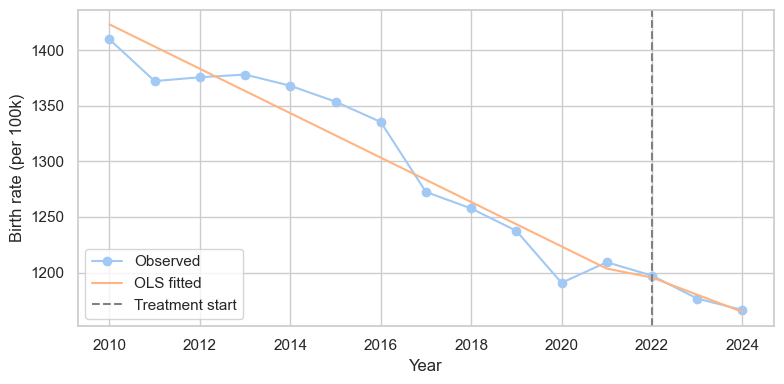

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.diagnostic import acorr_ljungbox

# ---- Example: your data --------------------------------
# df has columns: 'year' (int), 'birth_rate' (per 100k or per 1k)
# treatment_year is the first year you consider 'post' (e.g., 2022)

treatment_year = 2022
all_births['time'] = np.arange(len(all_births))

# post indicator 
all_births['post'] = (all_births['year'] >= treatment_year).astype(int)

# time since treatment (0 before, 1 at first post, etc.). Alternative: time*post
all_births['time_after'] = all_births['time'] - all_births.loc[all_births['post']==1, 'time'].min() 
all_births['time_after'] = all_births['time_after'].clip(lower=0)

# ---- Segmented OLS (with HAC / Newey-West SEs) -------------
formula = 'birth_rate ~ time + post + time_after'
ols_mod = smf.ols(formula, data=all_births).fit(cov_type='HAC', cov_kwds={'maxlags':1})
# maxlags: set to roughly sqrt(n) or based on ACF; adjust for annual vs monthly

print(ols_mod.summary())

# ---- Diagnostics: residual autocorrelation ----
resid = ols_mod.resid
# Ljung-Box (lags up to 4 for annual, up to 12 for monthly)
lb = acorr_ljungbox(resid, lags=[4], return_df=True)
print("Ljung-Box p-value (lag4):\n", lb)

# ACF/PACF plots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(resid, lags=5)
plot_pacf(resid, lags=5)
plt.show()

# ---- If residuals are autocorrelated, use SARIMAX (AR errors) ----
# allow autoregressive error structure (e.g., AR(1))
exog = sm.add_constant(all_births[['time','post','time_after']])
sar = sm.tsa.SARIMAX(all_births['birth_rate'], exog=exog, order=(1,0,0), enforce_stationarity=False)
sar_res = sar.fit(disp=False)
print(sar_res.summary())

# ---- Plot observed vs fitted & vertical line at treatment ----
plt.figure(figsize=(8,4))
plt.plot(all_births['year'], all_births['birth_rate'], marker='o', label='Observed')
plt.plot(all_births['year'], ols_mod.fittedvalues, label='OLS fitted')
plt.axvline(x=treatment_year, color='grey', linestyle='--', label='Treatment start')
plt.ylabel('Birth rate (per 100k)')
plt.xlabel('Year')
plt.legend()
plt.tight_layout()
plt.show()


In [10]:
# Generate statewide births by race dataset
births_by_race_statewide = births_by_race[["year", "race", "births", "population", "birth_rate"]].groupby(["year","race"]).sum().drop(columns = ["birth_rate"]).reset_index()
# Recalculate birth rates (per 10K)
births_by_race_statewide["birth_rate"] = round(10000*(births_by_race_statewide["births"] / births_by_race_statewide["population"]),2)

# By excluding Other and Unknown races, dropping ~5% of the dataset
# Necessary because there are no population numbers for these categories
drop_total = 100*births_by_race_statewide[births_by_race_statewide["race"].isin(["Other",'Unknown'])]["births"].sum() / births_by_race_statewide["births"].sum()
print(f"Percentage of births dropped from the dataset when excluding 'Other' and 'Unknown' races: {drop_total:.2f}%")
births_by_race_statewide = births_by_race_statewide[~births_by_race_statewide["race"].isin(["Other",'Unknown'])]

Percentage of births dropped from the dataset when excluding 'Other' and 'Unknown' races: 5.10%


In [154]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import StrMethodFormatter

# Set theme similar to your other plot
sns.set_theme(style="whitegrid", palette="pastel")

# Convert year to numeric
births_merged['year'] = births_merged['year'].astype(int)

# Aggregate mean distance by year
grouped = births_merged.groupby("year")["dist_mean"].mean().reset_index()

# Create the point plot
g = sns.pointplot(
    data=grouped,
    x="year",
    y="dist_mean",
    color="green",
    marker="o",
    linestyles="-"
)

# Expand y-axis and start at 0
ymax = grouped["dist_mean"].max()
g.set_ylim(0, ymax * 1.15)  # 15% headroom

# Title
g.set_title("Average Distance to Provider by Year", fontsize=14, weight='bold')

# Rotate x-ticks
g.set_xticklabels(g.get_xticks(), rotation=45)

# Add vertical line for 2022 abortion ban
plt.axvline(x=2022, linestyle='--', color='lightgrey', linewidth=1.5)
g.text(2022 + 0.2, ymax * 0.8, "2022 Abortion Ban", rotation=90, color='black', va='top', ha='left')

# Format y-axis
g.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

# Remove unnecessary gridlines or keep subtle ones
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()


NameError: name 'births_merged' is not defined

In [12]:
births_by_race_statewide

year                                       race   births  population  \
0    2010           American Indian or Alaska Native   5529.0    337258.0   
1    2010                                      Asian    979.0     66700.0   
2    2010                  Black or African American   4458.0    284041.0   
3    2010                         More than one race   2444.0    207154.0   
4    2010  Native Hawaiian or Other Pacific Islander    144.0      4595.0   
..    ...                                        ...      ...         ...   
113  2024                                      Asian   1268.0    112001.0   
114  2024                  Black or African American   3552.0    321914.0   
115  2024                         More than one race   4748.0    280735.0   
116  2024  Native Hawaiian or Other Pacific Islander    220.0      9583.0   
119  2024                                      White  30620.0   2973266.0   

     birth_rate  
0        163.94  
1        146.78  
2        156.95  
3        117.98  
4        313.38  
..          ...  
113      113.21  
114      110.34  
115      169.13  
116      229.57  
119      102.98  

[90 rows x 5 columns]

In [13]:
# Post dummy: 1 if year is 2022 or later, 0 otherwise (time fixed effect)
births_by_race_statewide['post'] = (births_by_race_statewide ['year'] >= 2022).astype(int)

# Run the Ordinary Least Squares (OLS) regression
formula = 'birth_rate ~ post * C(race)'
model = smf.ols(formula, data=births_by_race_statewide).fit()

print(model.summary().tables[1])

                                                                coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------
Intercept                                                   140.4642      4.557     30.825      0.000     131.392     149.536
C(race)[T.Asian]                                              0.5208      6.444      0.081      0.936     -12.309      13.350
C(race)[T.Black or African American]                          4.3000      6.444      0.667      0.507      -8.530      17.130
C(race)[T.More than one race]                                 4.8783      6.444      0.757      0.451      -7.951      17.708
C(race)[T.Native Hawaiian or Other Pacific Islander]        150.6400      6.444     23.376      0.000     137.810     163.470
C(race)[T.White]                                            -22.0417      6.444     -3.420      0.001     -34.871     

## Births by Age

In [14]:
# Upload cleaned dataset 
births_by_age = pd.read_csv("../data/output/oklahoma_births-by-county_by-age_2010-2024.csv")

# Visualuze
births_by_age.groupby(["year","county","age"]).sum().head(20)

births  population  birth_rate
year county  age                                        
2010 Adair   15-17 years    17.0      1069.0        15.9
             18-19 years    42.0       671.0        62.6
             20-24 years   154.0      1274.0       120.9
             25-29 years   103.0      1375.0        74.9
             30-34 years    35.0      1343.0        26.1
             35-39 years    21.0      1437.0        14.6
             40-44 years     0.0      1491.0         0.0
     Alfalfa 15-17 years     0.0       195.0         0.0
             18-19 years     0.0        83.0         0.0
             20-24 years    19.0       216.0        88.0
             25-29 years    13.0       268.0        48.5
             30-34 years     6.0       267.0        22.5
             35-39 years     5.0       412.0        12.1
             45-54 years     0.0      1032.0         0.0
     Atoka   15-17 years     8.0       587.0        13.6
             18-19 years    25.0       356.0        70.2
             20-24 years    59.0       828.0        71.3
             25-29 years    47.0       917.0        51.3
             30-34 years    21.0       852.0        24.6
             35-39 years    10.0       881.0        11.4

In [15]:
# Generate statewide births by age dataset
births_by_age_statewide = births_by_age[["year", "age", "births", "population", "birth_rate"]].groupby(["year","age"]).sum().drop(columns = ["birth_rate"]).reset_index()
# Recalculate birth rates (per 10K)
births_by_age_statewide["birth_rate"] = round(10000*(births_by_age_statewide["births"] / births_by_age_statewide["population"]),2)

# By excluding Unknown age, dropping ~5% of the dataset
# Necessary because there are no population numbers for these categories
drop_total = 100*births_by_age_statewide[births_by_age_statewide["age"].isin(["Unknown Age"])]["births"].sum() / births_by_age_statewide["births"].sum()
print(f"Percentage of births dropped from the dataset when excluding 'Unknown' ages: {drop_total:.2f}%")
births_by_age_statewide = births_by_age_statewide[~births_by_age_statewide["age"].isin(['Unknown Age'])]

Percentage of births dropped from the dataset when excluding 'Unknown' ages: 0.01%


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Compute yearly mean distance
births_merged['year'] = births_merged['year'].astype(str)
grouped = births_merged.groupby("year", as_index=True)["dist_mean"].mean()

# Create the figure
plt.figure(figsize=(9, 5))

# Plot green line + green points
plt.plot(grouped.index, grouped.values, linewidth=2.8, color="green", marker='o')

# Titles and labels
plt.title("Average Distance to Provider by Year", fontsize=14, weight='bold')
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average Distance", fontsize=12)

# Force axes to start at 0
plt.xlim(left=0)
plt.ylim(bottom=0)

# --- Add vertical line at 2022 ---
plt.axvline(x="2022", color="black", linestyle="--", linewidth=1.5)

# Add vertical text
plt.text(
    "2022", 
    plt.ylim()[1],              # top of the y-axis
    "2022 abortion ban",
    rotation=90,
    verticalalignment="top",
    horizontalalignment="right",
    fontsize=10
)

# Remove gridlines
plt.grid(False)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

plt.show()


NameError: name 'births_merged' is not defined

In [17]:
# Post dummy: 1 if year is 2022 or later, 0 otherwise (time fixed effect)
births_by_age_statewide['post'] = (births_by_age_statewide['year'] >= 2022).astype(int)

# Run the Ordinary Least Squares (OLS) regression
formula = 'birth_rate ~ post * C(age)'
model = smf.ols(formula, data=births_by_age_statewide).fit()

print(model.summary().tables[1])

                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      1.4133      8.575      0.165      0.869     -15.569      18.396
C(age)[T.15-17 years]         73.5558     12.127      6.065      0.000      49.539      97.573
C(age)[T.18-19 years]        309.8717     12.127     25.552      0.000     285.854     333.889
C(age)[T.20-24 years]        510.0267     12.127     42.056      0.000     486.009     534.044
C(age)[T.25-29 years]        580.7867     12.127     47.891      0.000     556.769     604.804
C(age)[T.30-34 years]        426.4500     12.127     35.165      0.000     402.433     450.467
C(age)[T.35-39 years]        176.4883     12.127     14.553      0.000     152.471     200.506
C(age)[T.40-44 years]         32.2683     12.127      2.661      0.009       8.251      56.286
C(age)[T.45-54 years]         -0.5542     12.127  

## Live Births by Gestation Age

In [18]:
# Upload cleaned dataset 
births_by_gestation_age = pd.read_csv('../data/output/oklahoma_birth-weight_2010-2024.csv')

# Visualuze
births_by_gestation_age.groupby(["year","gestation_age"]).sum().head(20)

live_births  percent_live_births
year gestation_age                                  
2010 32-36 weeks         5004.0                  9.4
     37-39 weeks        36502.0                 68.9
     40-41 weeks        10418.0                 19.7
     42+ weeks            150.0                  0.3
     <32 weeks            911.0                  1.7
     Unknown              220.0                  0.0
2011 32-36 weeks         4764.0                  9.1
     37-39 weeks        35632.0                 68.4
     40-41 weeks        10697.0                 20.5
     42+ weeks            142.0                  0.3
     <32 weeks            869.0                  1.7
     Unknown              148.0                  0.0
2012 32-36 weeks         4851.0                  9.2
     37-39 weeks        36109.0                 68.7
     40-41 weeks        10583.0                 20.1
     42+ weeks            146.0                  0.3
     <32 weeks            856.0                  1.6
     Unknown              195.0                  0.0
2013 32-36 weeks         4786.0                  9.0
     37-39 weeks        36577.0                 68.7

In [19]:
# By excluding Unknown age, dropping ~5% of the dataset
# Necessary because there are no population numbers for these categories
drop_total = 100*births_by_gestation_age[births_by_gestation_age["gestation_age"].isin(["Unknown"])]["live_births"].sum() / births_by_gestation_age["live_births"].sum()
print(f"Percentage of births dropped from the dataset when excluding 'Unknown' ages: {drop_total:.2f}%")
births_by_gestation_age = births_by_gestation_age[~births_by_gestation_age["gestation_age"].isin(['Unknown'])]

Percentage of births dropped from the dataset when excluding 'Unknown' ages: 0.18%


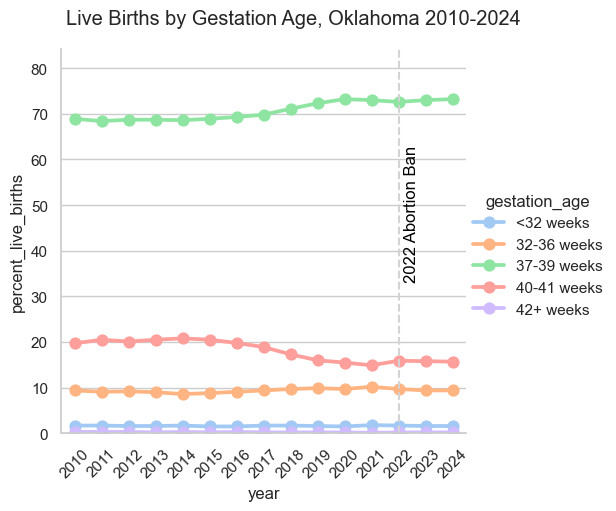

In [20]:
# Visualize trends across age groups

sns.set_theme(style="whitegrid", palette="pastel")

g = sns.catplot(
    data=births_by_gestation_age,
    x="year",
    y="percent_live_births",
    hue="gestation_age",
    markers="o",
    linestyles="-",
    kind="point",
)

# Expand y-axis and starting at 0
ymax = births_by_gestation_age["percent_live_births"].max()
g.ax.set_ylim(0, ymax * 1.15)  # 15% headroom above the max

# Set plot title 
g.fig.suptitle("Live Births by Gestation Age, Oklahoma 2010-2024")
g.fig.subplots_adjust(top=0.9) # Adjust so title doesn't overlap

# Rotate x-ticks
plt.xticks(rotation=45)

# Add line for 2022 abortion ban
plt.axvline(x=12, linestyle='--', color='lightgrey') 
# Add a label next to the vertical line
ymax = g.ax.get_ylim()[1]  # Top of y-axis
g.ax.text(12 + 0.2, ymax*0.75, "2022 Abortion Ban", rotation=90, color='black', va='top', ha='left')

# Format y-axis with commas
g.ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

plt.show()


## Live Births by Education

In [174]:
# Upload cleaned dataset 
births_by_education = pd.read_csv('../data/output/oklahoma_births_by-mothers-edu_2010-2024.csv')

# Visualuze
births_by_education.groupby(["year","education"]).sum().head(20)

county  \
year education                                                          
2010 0 - 8 years    AdairAlfalfaAtokaBeaverBeckhamBlaineBryanCaddo...   
     12 years       AdairAlfalfaAtokaBeaverBeckhamBlaineBryanCaddo...   
     13 - 15 years  AdairAlfalfaAtokaBeaverBeckhamBlaineBryanCaddo...   
     9 - 11 years   AdairAlfalfaAtokaBeaverBeckhamBlaineBryanCaddo...   
     >= 16 years    AdairAlfalfaAtokaBeaverBeckhamBlaineBryanCaddo...   
     UNKNOWN        AdairAlfalfaAtokaBeaverBeckhamBlaineBryanCaddo...   
2011 0 - 8 years    AdairAlfalfaAtokaBeaverBeckhamBlaineBryanCaddo...   
     12 years       AdairAlfalfaAtokaBeaverBeckhamBlaineBryanCaddo...   
     13 - 15 years  AdairAlfalfaAtokaBeaverBeckhamBlaineBryanCaddo...   
     9 - 11 years   AdairAlfalfaAtokaBeaverBeckhamBlaineBryanCaddo...   
     >= 16 years    AdairAlfalfaAtokaBeaverBeckhamBlaineBryanCaddo...   
     UNKNOWN        AdairAlfalfaAtokaBeaverBeckhamBlaineBryanCaddo...   
2012 0 - 8 years    AdairAlfalfaAtokaBeaverBeckhamBlaineBryanCaddo...   
     12 years       AdairAlfalfaAtokaBeaverBeckhamBlaineBryanCaddo...   
     13 - 15 years  AdairAlfalfaAtokaBeaverBeckhamBlaineBryanCaddo...   
     9 - 11 years   AdairAlfalfaAtokaBeaverBeckhamBlaineBryanCaddo...   
     >= 16 years    AdairAlfalfaAtokaBeaverBeckhamBlaineBryanCaddo...   
     UNKNOWN        AdairAlfalfaAtokaBeaverBeckhamBlaineBryanCaddo...   
2013 0 - 8 years    AdairAlfalfaAtokaBeaverBeckhamBlaineBryanCaddo...   
     12 years       AdairAlfalfaAtokaBeaverBeckhamBlaineBryanCaddo...   

                    live_births  percent_live_births  
year education                                        
2010 0 - 8 years         2037.0               161.60  
     12 years           15096.0              2580.70  
     13 - 15 years      15816.0              2234.00  
     9 - 11 years        9662.0              1452.50  
     >= 16 years        10345.0              1198.90  
     UNKNOWN              108.0                 0.00  
2011 0 - 8 years         1931.0               187.10  
     12 years           14461.0              2508.85  
     13 - 15 years      15814.0              2314.90  
     9 - 11 years        8825.0              1338.10  
     >= 16 years        10986.0              1276.55  
     UNKNOWN              105.0                 8.95  
2012 0 - 8 years         1813.0               162.80  
     12 years           14728.0              2522.45  
     13 - 15 years      16296.0              2405.75  
     9 - 11 years        8651.0              1343.15  
     >= 16 years        11043.0              1191.15  
     UNKNOWN               86.0                 0.00  
2013 0 - 8 years         1809.0               155.90  
     12 years           14960.0              2509.80

In [175]:
# By excluding Unknown age, dropping ~5% of the dataset
# Necessary because there are no population numbers for these categories
drop_total = 100*births_by_education[births_by_education["education"].isin(["UNKNOWN"])]["live_births"].sum() / births_by_education["live_births"].sum()
print(f"Percentage of births dropped from the dataset when excluding 'Unknown': {drop_total:.2f}%")
births_by_education = births_by_education[~births_by_education["education"].isin(["UNKNOWN"])]

Percentage of births dropped from the dataset when excluding 'Unknown': 0.16%


In [ ]:
# getting population

edu_census_vars = {

2013: {
    '0 - 8 years':'DP02_0059E',
    '9 - 11 years':'DP02_0060E',
    '12 years':'DP02_0061E',
    '13 - 15 years':'DP02_0062E',
    '>= 16 years 1':'DP02_0064E',
    '>= 16 years 2':'DP02_0065E'
       },
    
2018: {
    '0 - 8 years':'DP02_0059E',
    '9 - 11 years':'DP02_0060E',
    '12 years':'DP02_0061E',
    '13 - 15 years':'DP02_0062E',
    '>= 16 years 1':'DP02_0064E',
    '>= 16 years 2':'DP02_0065E'
       },

2023: {
    '0 - 8 years':'DP02_0060E',
    '9 - 11 years':'DP02_0061E',
    '12 years':'DP02_0062E',
    '13 - 15 years':'DP02_0063E',
    '>= 16 years 1':'DP02_0065E',
    '>= 16 years 2':'DP02_0066E'
       },
}

for year in [2013, 2018, 2023]:
    edu_vars = edu_census_vars[year]
    edu_df_year = get_census(dataset = "acs/acs5/profile",
                        variables = list(edu_vars.values()),
                        year = year,
                        params = {
                          "for": "county:*",
                          "in": "state:40" # Oklahoma state FIPS code
                          },
                        guess_dtypes = True,
                        return_geoid = True)
    edu_df_year = edu_df_year.rename(columns={v:k for k,v in edu_vars.items()})
    edu_df_year['acs_window'] = year
    if year == 2013:
        edu_census_all_years_df = edu_df_year.copy()
    else:
        edu_census_all_years_df = pd.concat([edu_census_all_years_df, edu_df_year], ignore_index=True)

edu_census_all_years_df['>= 16 years'] = edu_census_all_years_df['>= 16 years 1'] + edu_census_all_years_df['>= 16 years 2']
edu_census_all_years_df = edu_census_all_years_df.drop(columns=['>= 16 years 1','>= 16 years 2'])

county_fips = pd.read_csv('../data/input/abortion_distance_raw.csv')
ok_county_fips = county_fips[county_fips['origin_state'] == 'OK'][['origin_fips_code','origin_county_name']]
ok_county_fips['origin_county_name'] = ok_county_fips['origin_county_name'].str.split(' County').str[0]
ok_county_fips_dict = dict(zip(ok_county_fips['origin_fips_code'].astype(int),ok_county_fips['origin_county_name']))
edu_census_all_years_df['county'] = edu_census_all_years_df['GEOID'].astype(int).map(ok_county_fips_dict)

acs_long = edu_census_all_years_df.melt(
    id_vars=['GEOID', 'county', 'acs_window'],
    value_vars=['0 - 8 years', '9 - 11 years', '12 years', '13 - 15 years', '>= 16 years'],
    var_name='education',
    value_name='population'
)

def assign_window(year):
    if 2010 <= year <= 2013:
        return 2013
    elif 2014 <= year <= 2018:
        return 2018
    elif 2019 <= year <= 2024:
        return 2023
    else:
        return None

births_by_education['acs_window'] = births_by_education['year'].apply(assign_window)

births_by_education['county'] = births_by_education['county'].str.lower()
acs_long['county'] = acs_long['county'].str.lower()

births_by_education = births_by_education.merge(
    acs_long,
    on=['county', 'acs_window', 'education'],
    how='left'
)

births_by_education['live_births_per_1000'] = 1000*births_by_education['live_births'] / births_by_education['population'] 

In [212]:
births_by_education.to_csv('../data/output/oklahoma_births_by-mothers-edu_w-pop_2010-2024.csv', index=False)

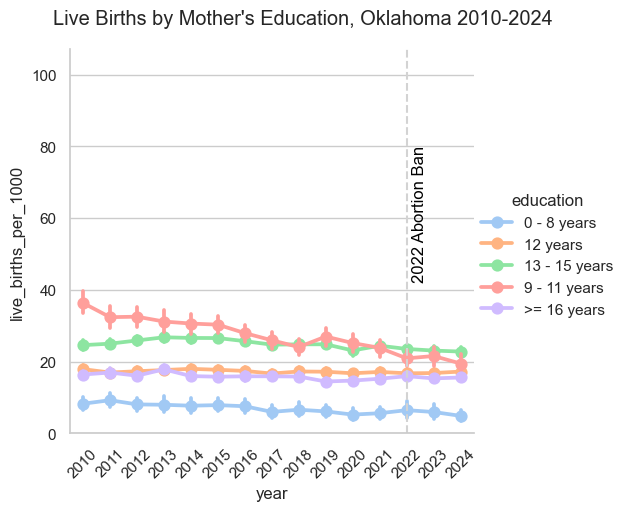

In [210]:
# Visualize trends across age groups

sns.set_theme(style="whitegrid", palette="pastel")

g = sns.catplot(
    data=births_by_education,
    x="year",
    y="live_births_per_1000",
    hue="education",
    markers="o",
    linestyles="-",
    kind="point",
)

# Expand y-axis and starting at 0
ymax = births_by_education["live_births_per_1000"].max()
g.ax.set_ylim(0, ymax * 1.15)  # 15% headroom above the max

# Set plot title 
g.fig.suptitle("Live Births by Mother's Education, Oklahoma 2010-2024")
g.fig.subplots_adjust(top=0.9) # Adjust so title doesn't overlap

# Rotate x-ticks
plt.xticks(rotation=45)

# Add line for 2022 abortion ban
plt.axvline(x=12, linestyle='--', color='lightgrey') 
# Add a label next to the vertical line
ymax = g.ax.get_ylim()[1]  # Top of y-axis
g.ax.text(12 + 0.2, ymax*0.75, "2022 Abortion Ban", rotation=90, color='black', va='top', ha='left')

# Format y-axis with commas
g.ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

plt.show()


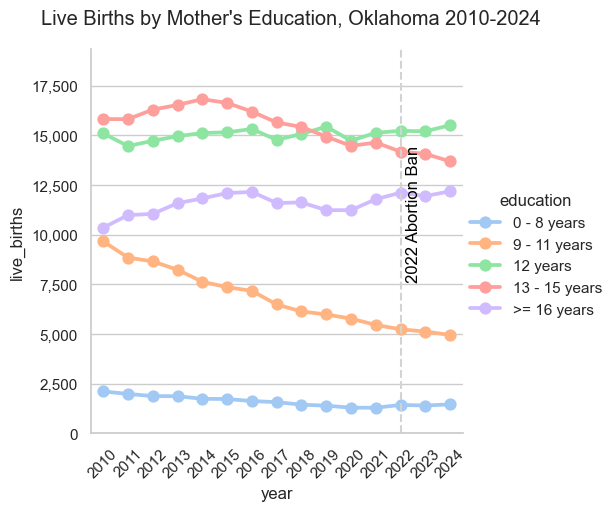

In [25]:
# Visualize trends across age groups

sns.set_theme(style="whitegrid", palette="pastel")

g = sns.catplot(
    data=births_by_education,
    x="year",
    y="live_births",
    hue="education",
    markers="o",
    linestyles="-",
    kind="point",
)

# Expand y-axis and starting at 0
ymax = births_by_education["live_births"].max()
g.ax.set_ylim(0, ymax * 1.15)  # 15% headroom above the max

# Set plot title 
g.fig.suptitle("Live Births by Mother's Education, Oklahoma 2010-2024")
g.fig.subplots_adjust(top=0.9) # Adjust so title doesn't overlap

# Rotate x-ticks
plt.xticks(rotation=45)

# Add line for 2022 abortion ban
plt.axvline(x=12, linestyle='--', color='lightgrey') 
# Add a label next to the vertical line
ymax = g.ax.get_ylim()[1]  # Top of y-axis
g.ax.text(12 + 0.2, ymax*0.75, "2022 Abortion Ban", rotation=90, color='black', va='top', ha='left')

# Format y-axis with commas
g.ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

plt.show()


## County Analysis

In [6]:
# Make a county dataset
births_by_county = births_by_age[["year", "county", "births", "population"]].groupby(["year","county"]).sum().reset_index()
births_by_county["birth_rate"] = round((1000*births_by_county["births"] / births_by_county["population"]),2)

# Gathering OK county geometry for mapping
ok_counties = pygris.counties(state = "OK")
# Merge with births by county
births_by_county = births_by_county.merge(ok_counties[["NAME", "geometry"]], left_on="county", right_on="NAME", how = "left")
# Drop unknown
births_by_county = births_by_county[births_by_county["county"] != "UNKNOWN"]
# convert to GeoDataFrame
births_by_county_gdf = gpd.GeoDataFrame(births_by_county, geometry="geometry")

Using the default year of 2024
Using FIPS code '40' for input 'OK'


In [10]:
# Choropleth for 2024

births_by_county_gdf_2024 = births_by_county_gdf[births_by_county_gdf["year"] == 2024]

lat = 35.0078  
lon = -97.0929

m = folium.Map(location=[lat, lon], tiles="cartodbpositron", zoom_start=6)

choropleth = folium.Choropleth(
        geo_data=births_by_county_gdf_2024,
        name="choropleth",
        data=births_by_county_gdf_2024,
        columns=["county", "birth_rate"],
        key_on="properties.county",
        fill_color="YlGn",
        fill_opacity=0.7,
        line_opacity=0.2,
        legend_name="Birth Rate (Births per 1,000)",
    ).add_to(m)

choropleth.geojson.add_child(
    GeoJsonTooltip(
        fields=['county', 'birth_rate'], # Columns to display on hover
        aliases=['County Name:', 'Birth Rate:'], # Labels for the displayed fields
        localize=True,
        sticky=False,
        labels=True,
        style="""
            background-color: #F0EFEF;
            color: #333333;
            font-family: verdana;
            font-size: 12px;
            padding: 10px;
        """,
        max_width=800
    )
)

m

In [25]:
# Finding states that border OK
us_states = pygris.states()
border_states = us_states[us_states['geometry'].intersects(births_by_county_gdf_2024.geometry.union_all())]

Using the default year of 2024


In [ ]:
border_states.exp

STATEFP   STATENS      GEOIDFQ GEOID STUSPS        NAME LSAD         ALAND  \
0       35  00897535  0400000US35    35     NM  New Mexico   00  314198519809   
6       05  00068085  0400000US05    05     AR    Arkansas   00  134658517854   
8       29  01779791  0400000US29    29     MO    Missouri   00  178052403953   
9       08  01779779  0400000US08    08     CO    Colorado   00  268418973518   
11      40  01102857  0400000US40    40     OK    Oklahoma   00  177664629521   
35      48  01779801  0400000US48    48     TX       Texas   00  676656702022   
46      20  00481813  0400000US20    20     KS      Kansas   00  211753821560   

         AWATER                                           geometry  
0     726531289  POLYGON ((-109.05017 31.48, -109.04984 31.4995...  
6    3122715710  POLYGON ((-94.61792 36.49941, -94.61765 36.499...  
8    2487375487  POLYGON ((-95.77355 40.5782, -95.76853 40.5833...  
9    1185541418  POLYGON ((-109.06025 38.59933, -109.05954 38.7...  
11   3373250292  POLYGON ((-103.00256 36.52659, -103.00219 36.6...  
35  19011620342  MULTIPOLYGON (((-94.7183 29.72886, -94.71721 2...  
46   1345663763  POLYGON ((-102.05174 40.00308, -101.9167 40.00...